In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from math import pi

In [44]:
team_results = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-26/team-results.csv')
public_selections = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-26/public-picks.csv')


In [45]:

team_results

,TEAMID,TEAM,PAKE,PAKERANK,PASE,PASERANK,GAMES,W,L,WINPERCENT,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4PERCENT,CHAMPPERCENT
0,1,Abilene Christian,0.7,45,0.7,52,3,1,2,0.333,2,1,0,0,0,0,0,0,0.10%,0.00%
1,2,Akron,-0.9,179,-1.1,187,4,0,4,0.000,4,0,0,0,0,0,0,0,0.50%,0.00%
2,3,Alabama,-2.1,211,-2.9,220,10,5,5,0.500,5,3,2,0,0,0,0,2,48.40%,15.40%
3,4,Albany,-0.4,147,-0.3,138,3,0,3,0.000,3,0,0,0,0,0,0,0,0.00%,0.00%
4,6,American,-0.5,160,-0.4,150,3,0,3,0.000,3,0,0,0,0,0,0,0,0.20%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,241,Wofford,-1.2,191,-0.9,175,6,1,5,0.167,5,1,0,0,0,0,0,0,3.60%,0.20%
232,242,Wright St.,-0.2,118,-0.2,119,2,0,2,0.000,2,0,0,0,0,0,0,0,0.00%,0.00%
233,243,Wyoming,-0.2,118,-0.5,159,1,0,1,0.000,1,0,0,0,0,0,0,0,0.00%,0.00%
234,244,Xavier,4.1,14,2.7,22,28,18,10,0.643,10,9,7,2,0,0,0,2,51.90%,8.70%


In [46]:
team_results['expectations'] = team_results.apply(lambda x: "underseeded" if x['PAKE'] >= x['PASE'] else "overseeded", axis=1)

# "underseeded" if team_results['PAKE'] >= team_results['PASE'] else "overseeded"
team_results['rank_diff'] = team_results['PAKE'] - team_results['PASE']


conditions = [team_results['rank_diff'] < -2,
              (team_results['rank_diff'] < -1) & (team_results['rank_diff'] > -2),
              (team_results['rank_diff'] > -1) & (team_results['rank_diff'] < 0),
              (team_results['rank_diff'] > 0) & (team_results['rank_diff'] < 1),
              (team_results['rank_diff'] > 1) & (team_results['rank_diff'] < 2),
              (team_results['rank_diff'] > 2)]

values = ["way_under", "under", "little_under", "little_over", "over", "way_over"]

team_results['expect_groups'] = np.select(conditions, values, "way_over")
team_results['expect_groups'] = pd.Categorical(team_results['expect_groups'], categories=values)

team_results.head()

,TEAMID,TEAM,PAKE,PAKERANK,PASE,PASERANK,GAMES,W,L,WINPERCENT,...,E8,F4,F2,CHAMP,TOP2,F4PERCENT,CHAMPPERCENT,expectations,rank_diff,expect_groups
0,1,Abilene Christian,0.7,45,0.7,52,3,1,2,0.333,...,0,0,0,0,0,0.10%,0.00%,underseeded,0.0,way_over
1,2,Akron,-0.9,179,-1.1,187,4,0,4,0.000,...,0,0,0,0,0,0.50%,0.00%,underseeded,0.2,little_over
2,3,Alabama,-2.1,211,-2.9,220,10,5,5,0.500,...,0,0,0,0,2,48.40%,15.40%,underseeded,0.8,little_over
3,4,Albany,-0.4,147,-0.3,138,3,0,3,0.000,...,0,0,0,0,0,0.00%,0.00%,overseeded,-0.1,little_under
4,6,American,-0.5,160,-0.4,150,3,0,3,0.000,...,0,0,0,0,0,0.20%,0.00%,overseeded,-0.1,little_under


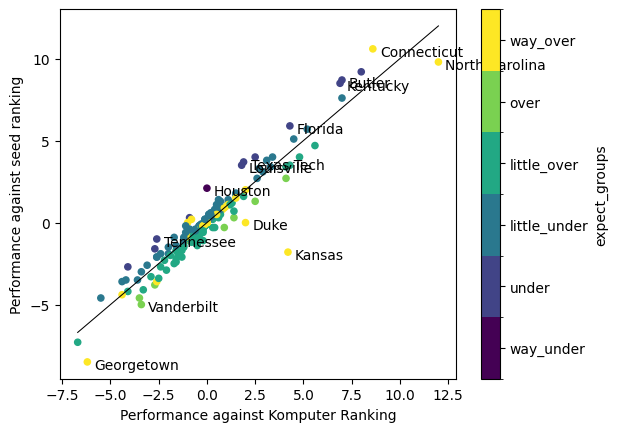

In [47]:
filtered_teams = team_results[abs(team_results['rank_diff']) > 1.5]


team_results.plot(x='PAKE', y='PASE', kind='scatter', c='expect_groups', colormap='viridis')

#label outliers
for idx, row in filtered_teams.iterrows():
    plt.annotate(row['TEAM'], (row['PAKE'], row['PASE']), xytext=(5, -5), textcoords='offset points')


# abline
x_values = np.linspace(team_results['PAKE'].min(), team_results['PAKE'].max(), 100)
plt.plot(x_values, x_values, color='black', linewidth=0.75)


plt.xlabel('Performance against Komputer Ranking')
plt.ylabel('Performance against seed ranking')
plt.show()





In [48]:
team_results['F4PERCENT'] = team_results['F4PERCENT'].str.replace('%', '').astype(float)


In [56]:


vars = team_results[['TEAM', 'F4PERCENT', 'PAKE', 'PASE', 'GAMES', 'W', 'R64']]
def scale(col):
    # Here, you implement your scaling logic for each column
    # For demonstration, let's say you want to scale each column to have minimum 0 and maximum 1
    return (col - col.min()) / (col.max() - col.min())

# Apply the scale function across columns F4PERCENT to R64
vars_scaled = vars.loc[:, 'F4PERCENT':'R64'].apply(zscore)
vars = pd.concat([vars.drop(columns=vars_scaled.columns), vars_scaled], axis=1)
# vars.head()
best_teams = vars[vars['TEAM'].isin(["Houston", "Butler", "Florida Atlantic", "Kansas", "Purdue"])]
best_teams.head()

,TEAM,F4PERCENT,PAKE,PASE,GAMES,W,R64
20,Butler,0.841136,3.172559,3.702706,1.756574,1.764972,1.436822
51,Florida Atlantic,-0.467128,1.497865,1.447144,-0.293728,-0.000575,-0.893694
71,Houston,2.390397,0.004219,0.893893,0.975507,1.085915,0.562879
81,Kansas,3.193717,1.905223,-0.765859,4.392675,4.888632,3.184710
158,Purdue,2.306239,-1.987308,-1.872361,2.049474,1.629160,2.602080


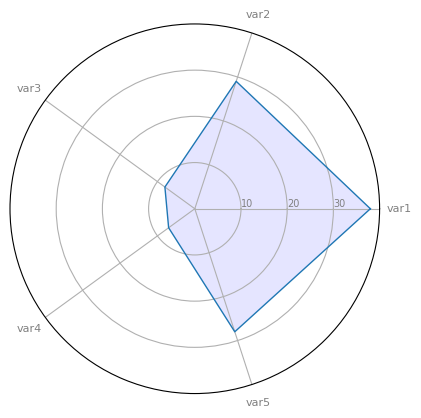

In [65]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()